# Doing Bayesian Data Analysis

Simple example from __Chapter 16__.

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = "retina"

import numpy as np
import pandas as pd
import pymc3 as pm
import theano.tensor as tt
from scipy import stats as st

from utils import plt, sns

In [2]:
# True params: mu = 100, sigma = 15
data = [85, 100, 115]
# Another possibility for observed data...
# y = st.norm(100, 15).rvs(5).round()
print data

with pm.Model() as model:
    # Priors
    tau = pm.Gamma("tau", .001, .001)
    mu = pm.Normal("mu", mu=0, tau=1E-8)
    # Likelihood
    y = pm.Normal("y", mu=mu, tau=tau, observed=data)
    # Sample
    trace = pm.sample(draws=5000, tune=1000, chain=3)
    
burn_in = 1000

[85, 100, 115]


Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average ELBO = -29.175: 100%|██████████| 200000/200000 [00:10<00:00, 18410.93it/s]
Finished [100%]: Average ELBO = -29.144
100%|██████████| 5000/5000 [00:06<00:00, 830.80it/s] 


           mean         sd  mc_error    hpd_2.5    hpd_97.5
mu   100.269089  19.566762  0.399568  59.346939  135.866662
tau    0.003595   0.003441  0.000167   0.000001    0.010743


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11c25fb10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11ace7290>]], dtype=object)

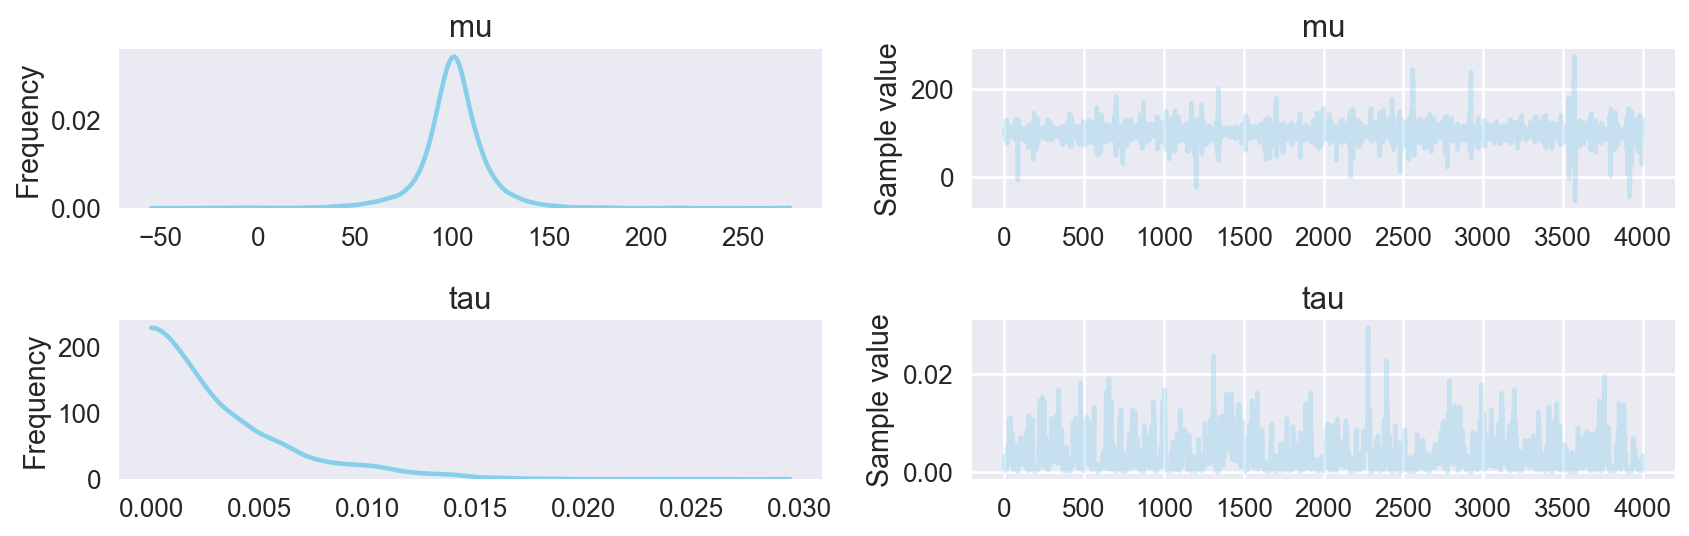

In [3]:
print pm.df_summary(trace[burn_in:])
pm.traceplot(trace[burn_in:])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11ca45fd0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11d288890>], dtype=object)

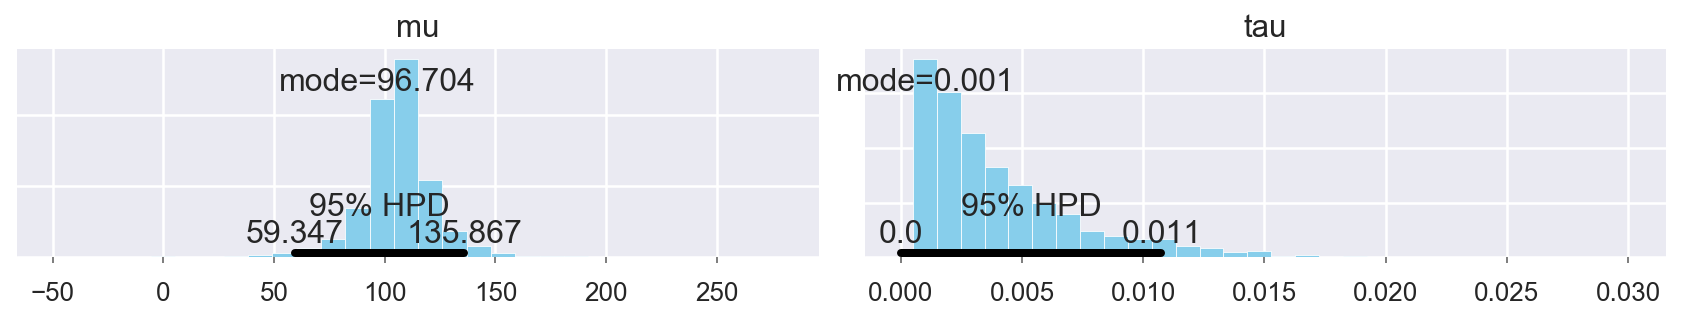

In [4]:
pm.plot_posterior(trace[burn_in:], point_estimate="mode")

### Extra Credit

It's a simple exercise, but wanted to test out two additional models:

* Use [Gelman's recommendation][gelman] of a `HalfCauchy` distribution for `sigma`
* A robust model with the `StudentT` distribution for likelihood

[gelman]: http://www.stat.columbia.edu/~gelman/research/published/taumain.pdf

In [5]:
with pm.Model() as gelman_model:
    # Priors
    sigma = pm.HalfCauchy("sigma", 10)
    mu = pm.Normal("mu", mu=0, tau=1E-8)
    # Likelihood
    y = pm.Normal("y", mu=mu, sd=sigma, observed=data)
    # Sample
    trace = pm.sample(draws=5000, tune=1000, chain=3)

Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average ELBO = -25.713: 100%|██████████| 200000/200000 [00:11<00:00, 17652.04it/s]
Finished [100%]: Average ELBO = -25.653
100%|██████████| 5000/5000 [00:05<00:00, 1277.08it/s]


             mean         sd  mc_error    hpd_2.5    hpd_97.5
mu     100.097651  14.152617  0.295941  73.880153  127.169488
sigma   20.513470  13.553047  0.660674   6.534990   45.023981


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11c00f910>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11b21eed0>]], dtype=object)

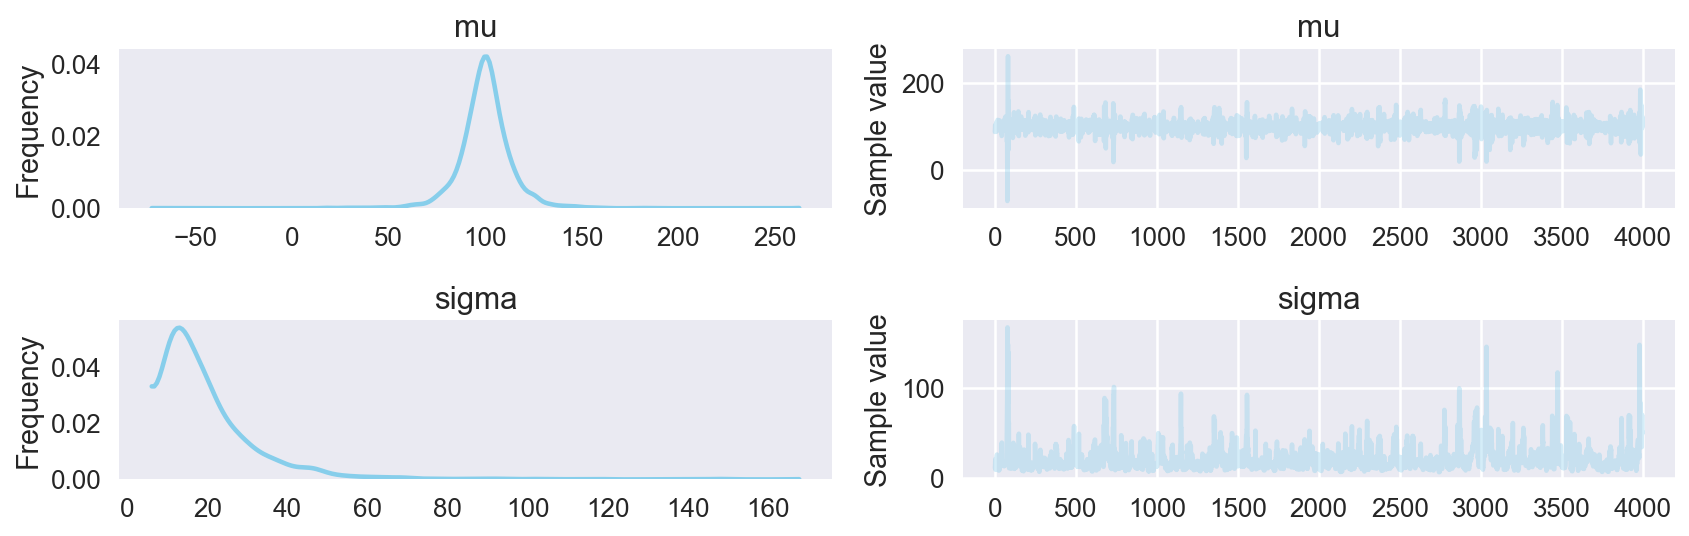

In [6]:
print pm.df_summary(trace[burn_in:])
pm.traceplot(trace[burn_in:])

In [7]:
# Mixing in a dash of robust estimation...
with pm.Model() as t_model:
    # Priors
    sigma = pm.HalfCauchy("sigma", 25)
    mu = pm.Normal("mu", mu=0, tau=1E-8)
    nu = pm.HalfCauchy("nu", 3)
    # Likelihood
    y = pm.StudentT("y", nu=nu, mu=mu, sd=sigma, observed=data)
    # Sample
    trace = pm.sample(draws=5000, tune=1000, chain=3)

Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average ELBO = -24.923: 100%|██████████| 200000/200000 [00:16<00:00, 12199.61it/s]
Finished [100%]: Average ELBO = -24.857
100%|██████████| 5000/5000 [00:15<00:00, 330.27it/s]


             mean           sd   mc_error    hpd_2.5    hpd_97.5
mu     100.465828    19.182569   0.484909  65.814836  132.227006
sigma   23.545847    25.729355   1.024286   3.462621   55.187459
nu      63.550392  1875.715020  42.437797   0.058225   47.963751


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11b345790>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11ef32b90>]], dtype=object)

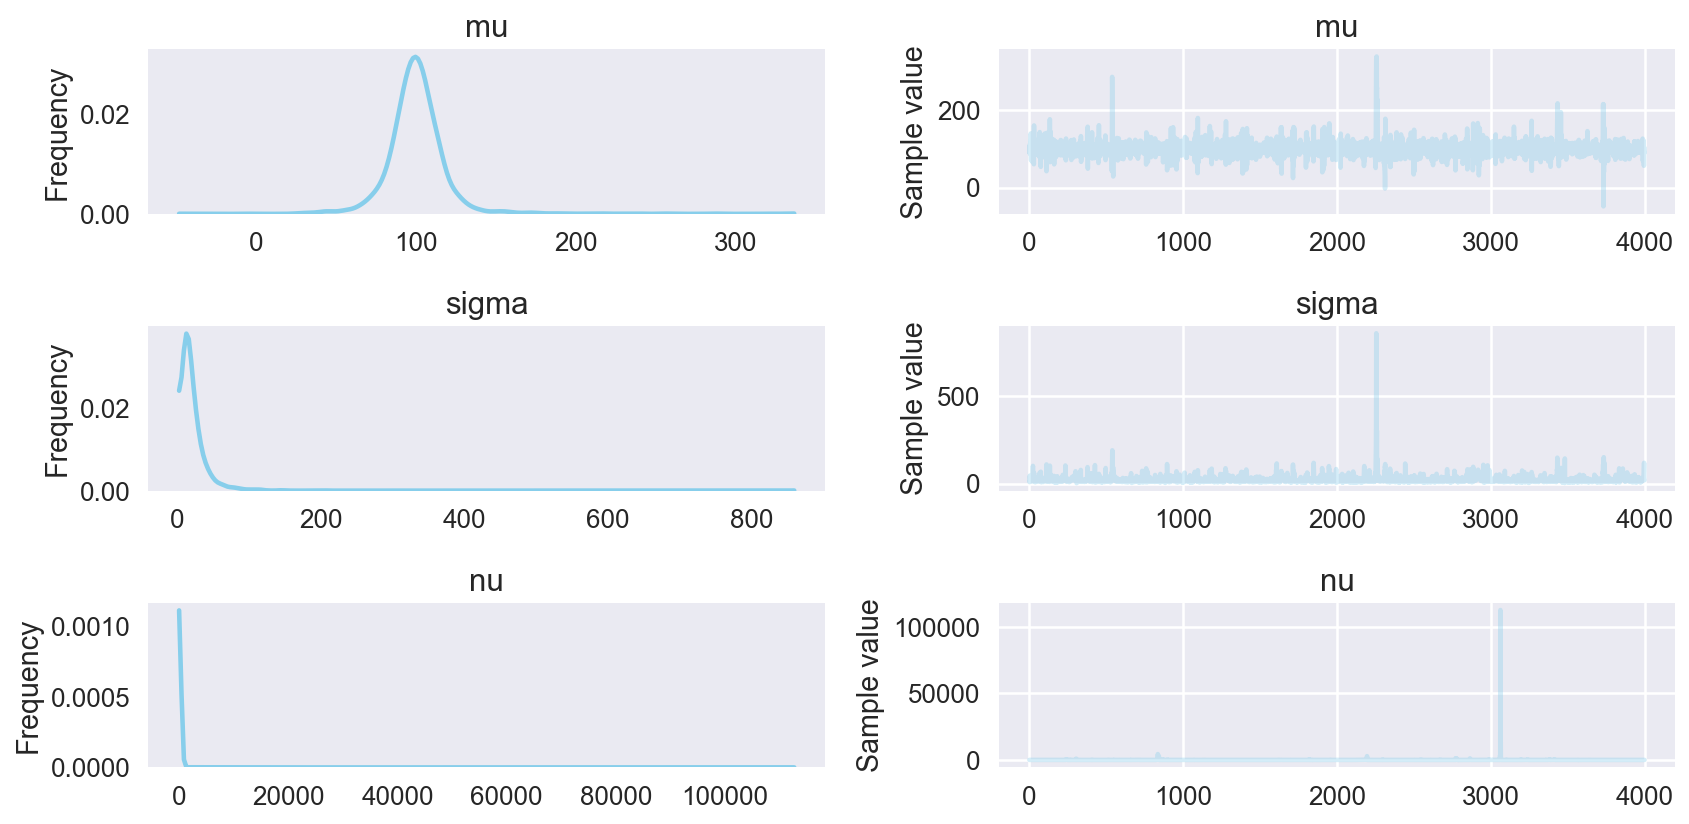

In [8]:
print pm.df_summary(trace[burn_in:])
pm.traceplot(trace[burn_in:])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11dc727d0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11c8f4350>], dtype=object)

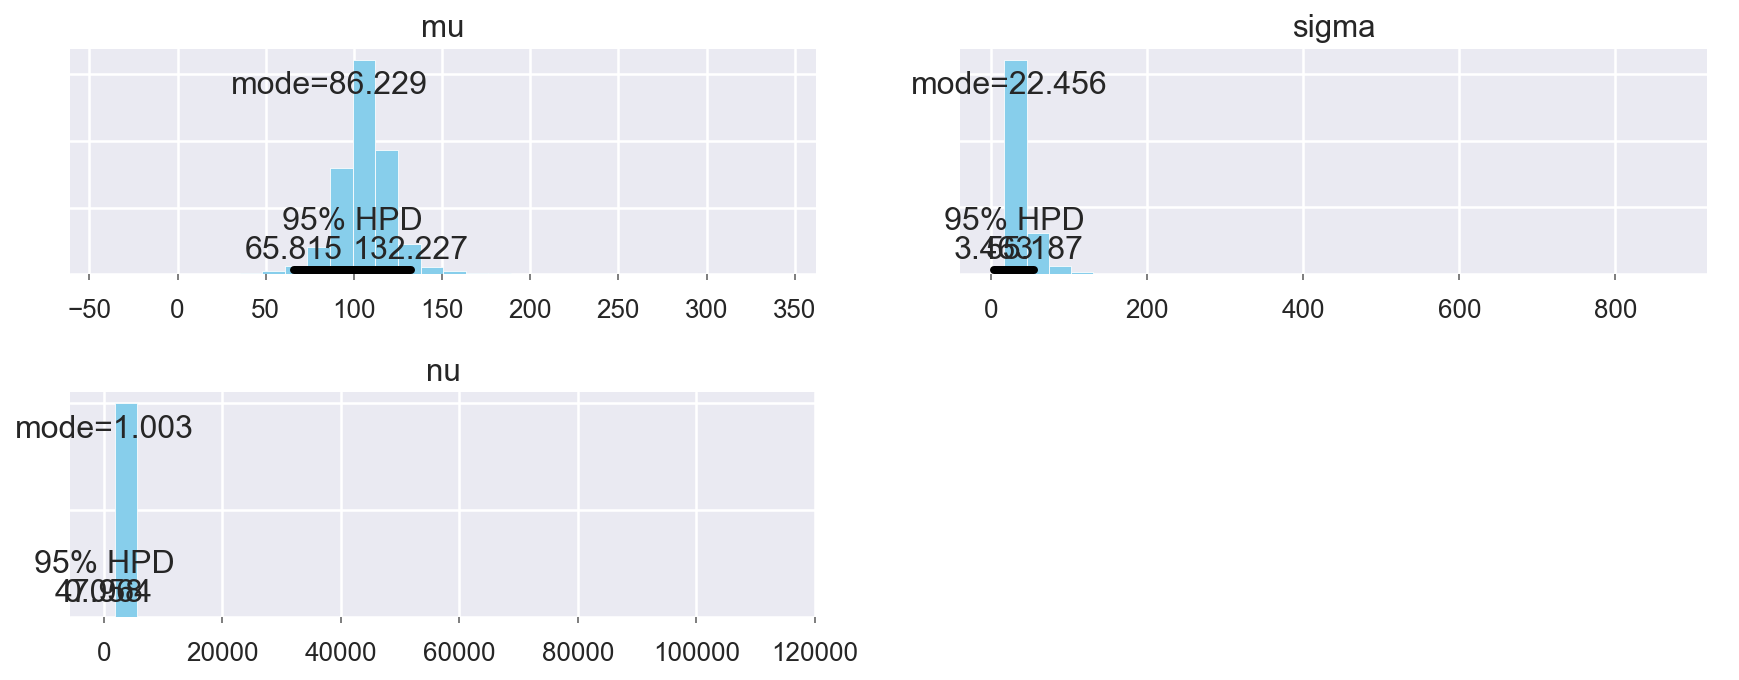

In [9]:
pm.plot_posterior(trace[burn_in:], point_estimate="mode")

In [10]:
# Wanted to take a closer look at `nu`
pm.summary(trace[burn_in:], varnames=["nu"])


nu:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  63.550           1875.715         42.438           [0.058, 47.964]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.587          2.026          3.995          8.986          107.748

